In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("pdg", np.uint32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32),
        ('TotalColumnDepthCGS',np.float32),
        ('MaxAzimuth',np.float32),
        ('SelectionWeight',np.float32),
        ('InIceNeutrinoEnergy',np.float32),
        ('PowerLawIndex',np.float32),
        ('TotalPrimaryWeight',np.float32),
        ('PrimaryNeutrinoZenith',np.float32),
        ('TotalWeight',np.float32),
        ('PropagationWeight',np.float32),
        ('NInIceNus',np.float32),
        ('TrueActiveLengthBefore',np.float32),
        ('TypeWeight',np.float32),
        ('PrimaryNeutrinoType',np.float32),
        ('RangeInMeter',np.float32),
        ('BjorkenY',np.float32),
        ('MinZenith',np.float32),
        ('InIceNeutrinoType',np.float32),
        ('CylinderRadius',np.float32),
        ('BjorkenX',np.float32),
        ('InteractionPositionWeight',np.float32),
        ('RangeInMWE',np.float32),
        ('InteractionColumnDepthCGS',np.float32),
        ('CylinderHeight',np.float32),
        ('MinAzimuth',np.float32),
        ('TotalXsectionCGS',np.float32),
        ('OneWeightPerType',np.float32),
        ('ImpactParam',np.float32),
        ('InteractionType',np.float32),
        ('TrueActiveLengthAfter',np.float32),
        ('MaxZenith',np.float32),
        ('InteractionXsectionCGS',np.float32),
        ('PrimaryNeutrinoEnergy',np.float32),
        ('DirectionWeight',np.float32),
        ('InjectionAreaCGS',np.float32),
        ('MinEnergyLog',np.float32),
        ('SolidAngle',np.float32),
        ('LengthInVolume',np.float32),
        ('NEvents',np.uint32),
        ('OneWeight',np.float32),
        ('MaxEnergyLog',np.float32),
        ('InteractionWeight',np.float32),
        ('EnergyLost',np.float32)
    ]
)
info_dtype = np.dtype(                                                                                                      
    [                                                                                                                           
    ("id", id_dtype),                                                                                                       
    ("image", np.float32, (300, 60)),
    ("neutrino", particle_dtype),
    ("daughter", particle_dtype),                                                                                           
    ("energies", np.float32,(10)),                                                                                          
    ("pdgs", np.float32,(10)),                                                                                              
    ("q_tot", np.float32),
    ("cog", np.float32,(3)),                                                                                                
    ("q_st", np.float32),
    ("st_pos", np.float32,(3)),                                                                                             
    ("st_num", np.float32),
    ("distance", np.float32),                                                                                               
    ("weight", weight_dtype),                                                                                                                    
    ]
)

keys_dtype = np.dtype(  
        [
        ("passed", np.bool_),
        ("header", np.bool_),
        ("raw_data", np.bool_),
        ("weights", np.bool_),
        ("mctree", np.bool_), 
        ("cvstats", np.bool_),
        ("pulses", np.bool_)
           ]
)
w_info_dtype = np.dtype(                                                                                                                    
        [                                                                                                                                         
        ("id", id_dtype),    
        ("neutrino", particle_dtype),
        ("energy", np.float32,(10)),
        ("pdg", np.float32,(10)),
        ("weight", weight_dtype),
        ("keys", keys_dtype)
    ]
)

In [11]:
size = 0
data = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode='r')
for i in data:
    if i['q_st'] >2000:
        size = size +1
print(size)

37436


In [12]:
pos = 0

data_2000 = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_NuEGR_2000.npy', mode = 'w+', dtype =info_dtype, shape=(size,1))
for i in data:
    if i['q_st'] >2000:
        data_2000[pos:pos+1] = i
        pos = pos + 1
print(data_2000.shape)

(37436, 1)


0.4535335 0.4535335
[(4294967280, 380103.2, [  53.26815, -159.2191 , 1947.9978 ], [0.07962972, 4.7971745 ], 7959.0273, 1731.6396)]
(300, 60)
0.05271135 0.05271135
[(16, 50493.516, [ 2082434.8, -2581879.2,  -929121.6], [1.843924, 5.391285], -11481457., 3444933.2)]
(300, 60)
0.11978082 0.11978082
[(4294967280, 129938.57, [ 2550945. ,  5281929.5, -8866878. ], [2.5571883, 1.1209582], -35452696., 5772598.)]
(300, 60)


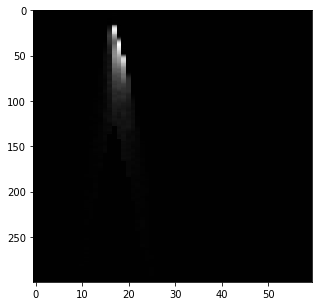

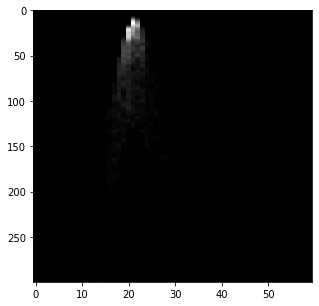

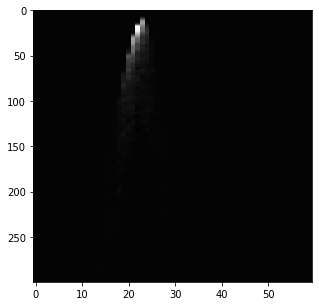

In [8]:
for i, im in enumerate(data_2000['image'][:3]):
    print(np.max(im), np.max(data_2000['image'][i]))
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
    print(data_2000['neutrino'][i])
    print(data_2000['image'][i][0].shape)

In [4]:
size = 0
data = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode='r')
for i in data:
    if i['q_st'] >2000:
        size = size +1
print(size)
data2 = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode='r')
for i in data2:
    if i['q_st'] >2000:
        size = size +1
print(size)

909575
947011


In [5]:
pos = 0

data_2000 = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_NuECC_2000.npy', mode = 'w+', dtype =info_dtype, shape=(size,1))
for i in data:
    if i['q_st'] >2000:
        data_2000[pos:pos+1] = i
        pos = pos + 1
print(pos)
for i in data2:
    if i['q_st'] >2000:
        data_2000[pos:pos+1] = i
        pos = pos + 1

print(data_2000.shape)

909575
(947011, 1)
